In [1]:
pip install wordcloud matplotlib networkx nltk pyvis pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.1 MB/s eta 0:00:00


In [ ]:
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✅ Preprocessing complete. Using 83069 tokens and 200 unique top words.


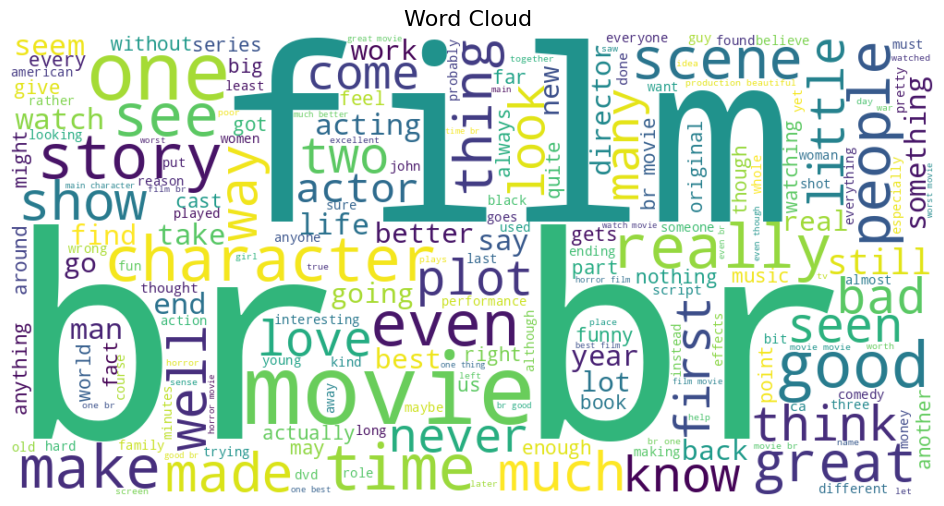

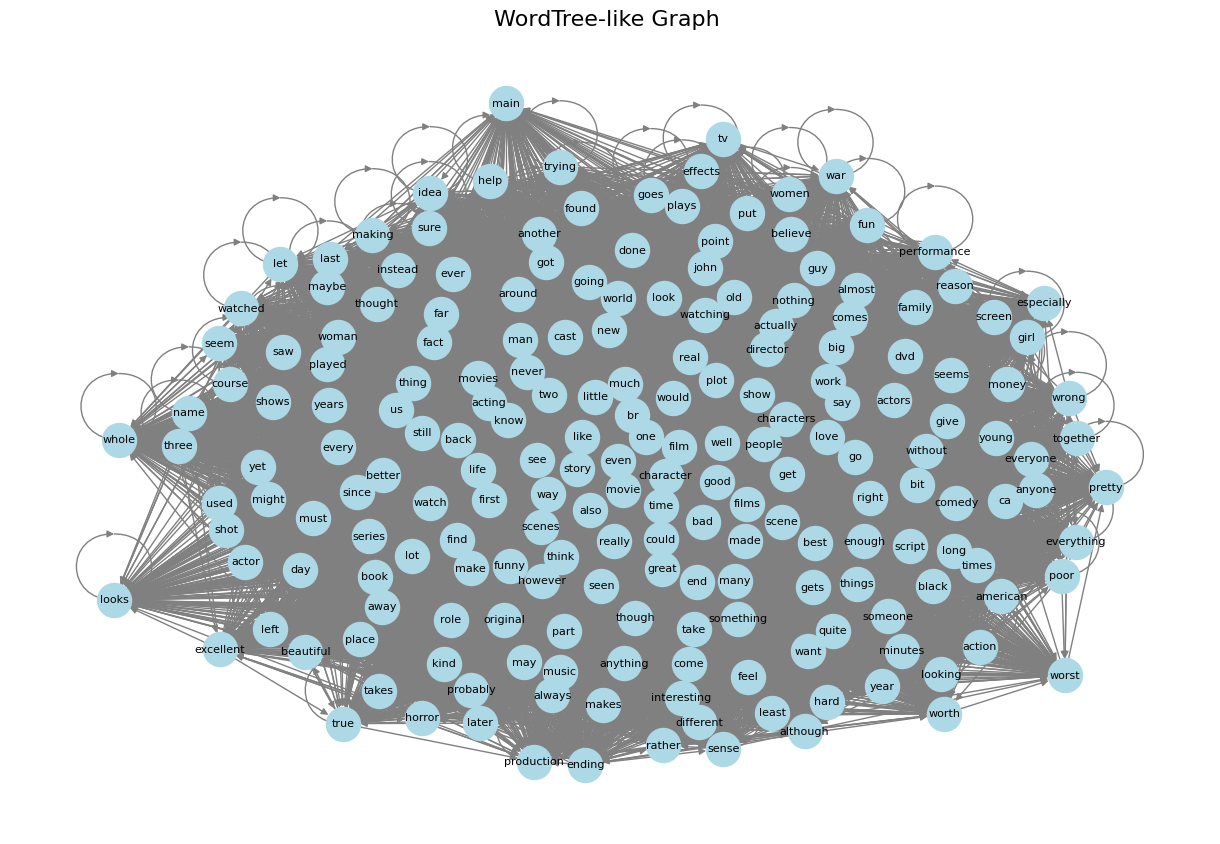

imdb_text_network.html


AttributeError: 'NoneType' object has no attribute 'render'

In [4]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import networkx as nx
from pyvis.network import Network
from collections import defaultdict, Counter

# -----------------------
# Download NLTK resources
# -----------------------
nltk.download('punkt')
nltk.download('punkt_tab')   # ✅ fix for LookupError
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# -----------------------
# 1. Load Dataset (Fixed ParserError handling)
# -----------------------
df = pd.read_csv(
    "/content/IMDB Dataset.csv",
    sep=",",                # comma separated
    quotechar='"',          # properly handle quotes
    escapechar="\\",        # handle backslashes
    on_bad_lines="skip",    # skip bad rows instead of error
    engine="python"         # tolerant parser
)

# Keep only the two main columns (safety)
df = df[["review", "sentiment"]]

# Use only a subset for performance
df = df.sample(2000, random_state=42)

# Combine reviews into one large text
text = " ".join(df['review'].astype(str).tolist())

# -----------------------
# 2. Preprocessing
# -----------------------
stop_words = set(stopwords.words('english'))
tokens = [w.lower() for w in word_tokenize(text) if w.isalpha() and w.lower() not in stop_words]

# Keep only Top 200 frequent words
word_freq = Counter(tokens)
top_words = set([w for w, _ in word_freq.most_common(200)])
tokens = [w for w in tokens if w in top_words]

print("✅ Preprocessing complete. Using", len(tokens), "tokens and", len(top_words), "unique top words.")

# -----------------------
# 3. Word Cloud
# -----------------------
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(" ".join(tokens))

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud ", fontsize=16)
plt.show()

# -----------------------
# 4. WordTree-like Visualization
# -----------------------
context_graph = defaultdict(list)
for i in range(len(tokens) - 1):
    context_graph[tokens[i]].append(tokens[i + 1])

G_tree = nx.DiGraph()
for word, neighbors in context_graph.items():
    for n in neighbors:
        if word in top_words and n in top_words:  # only keep top words
            G_tree.add_edge(word, n)

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_tree, k=0.3, seed=42)
nx.draw(G_tree, pos, with_labels=True, node_size=600, node_color="lightblue",
        font_size=8, arrows=True, edge_color="gray")
plt.title("WordTree-like Graph ", fontsize=16)
plt.show()

# -----------------------
# 5. InfraNodus-style Text Network Analysis
# -----------------------
window_size = 3
G_net = nx.Graph()

for i in range(len(tokens) - window_size + 1):
    window = tokens[i:i + window_size]
    for j in range(len(window)):
        for k in range(j + 1, len(window)):
            if window[j] in top_words and window[k] in top_words:
                G_net.add_edge(window[j], window[k])

# Interactive visualization with pyvis
net = Network(notebook=False, height="650px", width="100%", bgcolor="white", font_color="black")
net.from_nx(G_net)
net.show("imdb_text_network.html")

print("✅ Analysis complete with top 200 words: WordCloud, WordTree, and Text Network generated.")
print("👉 Open 'imdb_text_network.html' in your browser to explore the interactive network.")
